In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdb

In [2]:
df = pd.read_csv('data/dataset_challenge_one (6).tsv', sep='\t')

In [3]:
df.head()

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,...,Variable_1545,Variable_1546,Variable_1547,Variable_1548,Variable_1549,Variable_1550,Variable_1551,Variable_1552,Variable_1553,class
0,-0.954246,0.051024,-0.111203,-0.050066,-0.340897,-0.038770,-0.104256,-0.485671,-0.565482,0.159871,...,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795,0
1,0.244626,-0.199602,-0.111397,-0.135207,0.026813,-0.165675,0.081549,-0.736914,0.118127,-0.183824,...,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098,0
2,0.082434,-0.156199,-0.084980,-0.179003,-0.490377,-0.193691,0.186532,-0.801328,0.128750,0.403489,...,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911,0
3,-1.071614,-0.206041,-0.051775,-0.049676,-0.306176,0.061596,0.115982,-0.842997,-0.020820,-0.189779,...,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710,0
4,-0.982276,-0.514666,-0.118483,-0.086523,-0.377659,-0.093353,0.302795,-0.794573,-0.001558,-0.210314,...,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160,0


In [4]:
df.shape

(272, 1554)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Columns: 1554 entries, Variable_1 to class
dtypes: float64(1553), int64(1)
memory usage: 3.2 MB


In [6]:
df.iloc[:,:10].describe()

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,-0.025154,-0.042121,-0.019142,0.037009,-0.194510,-0.061548,-0.176837,-0.553139,-0.123134,-0.128201
std,0.626507,0.376843,0.301998,0.347107,0.387954,0.320156,0.379778,0.430015,0.367952,0.309881
min,-1.951243,-2.000000,-2.000000,-1.132837,-1.447581,-2.000000,-1.282915,-1.264297,-1.105607,-0.966596
25%,-0.165442,-0.160641,-0.106249,-0.077732,-0.358526,-0.203514,-0.394982,-0.802160,-0.439376,-0.292065
50%,0.056432,-0.049159,-0.029375,0.003066,-0.223017,-0.106265,-0.096464,-0.641877,-0.043508,-0.183556
75%,0.213871,0.099495,0.041888,0.064462,-0.083519,0.044360,0.069604,-0.429992,0.156628,-0.067523
max,1.897414,2.000000,2.000000,2.000000,2.000000,2.000000,0.941710,1.555690,0.643989,1.172441


* **More variables than instances (rows) - need dimensionality reduction or feature selection to avoid overfitting **

In [7]:
# Check if class label is biased
Counter(df['class'])

Counter({0: 195, 1: 77})

## Data Cleaning

In [8]:
print 'Pre-Clean: {}'.format(df.shape)
df.dropna(inplace=True)
print 'Post-Clean: {}'.format(df.shape)

Pre-Clean: (272, 1554)
Post-Clean: (270, 1554)


* ** Removed two rows (alternatively, can use collaborative filtering to predict missing values if they are crucial part of overall analysis)**

## Data Exploration and Visualizations

### Review summary statistics for each variable

In [9]:
df_vars = df.drop('class', axis=1)

In [10]:
summary_stats = df_vars.describe().loc[['min','max','mean','std']]
summary_stats = summary_stats.transpose()
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
summary_stats.head()

,min,max,mean,std,range
Variable_1,-1.951243,1.897414,-0.023060,0.628023,3.848657
Variable_2,-2.000000,2.000000,-0.043097,0.378034,4.000000
Variable_3,-2.000000,2.000000,-0.019198,0.303117,4.000000
Variable_4,-1.132837,2.000000,0.037204,0.348387,3.132837
Variable_5,-1.447581,2.000000,-0.194020,0.389332,3.447581


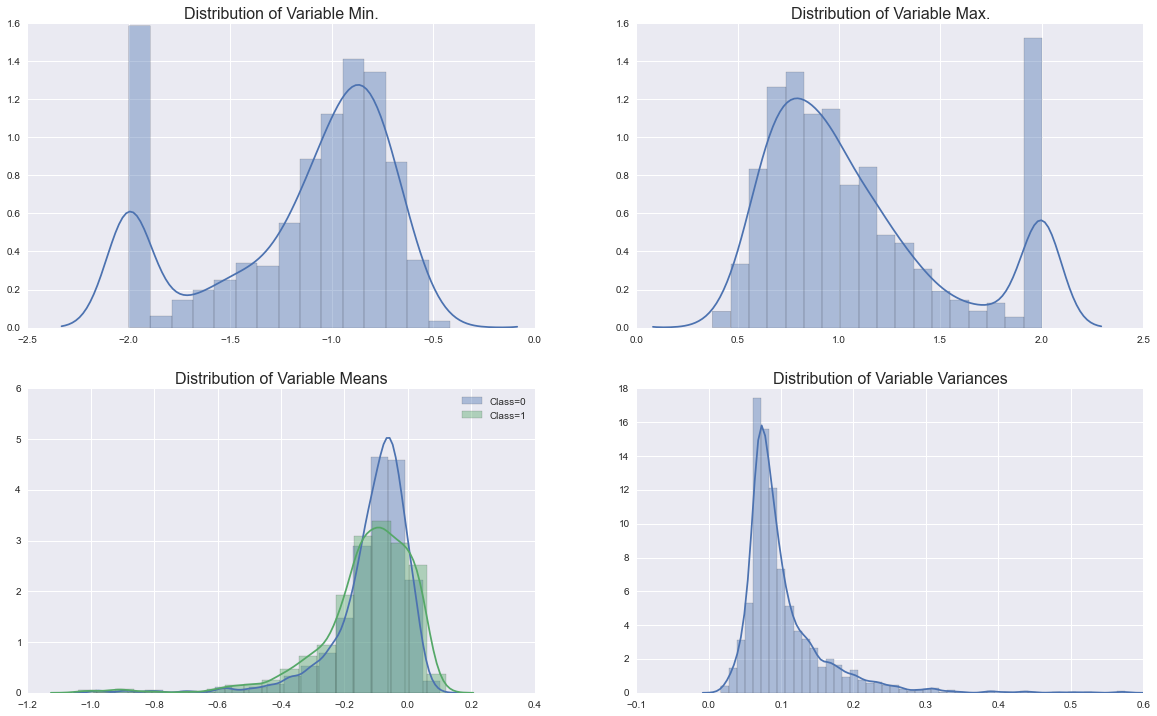

In [11]:
f, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(20,12))
ax1.set_title('Distribution of Variable Min.', size=16)
ax2.set_title('Distribution of Variable Max.', size=16)
ax3.set_title('Distribution of Variable Means', size=16)
ax4.set_title('Distribution of Variable Variances', size=16)
sns.distplot(summary_stats['min'], axlabel=False, ax=ax1, )
sns.distplot(summary_stats['max'], axlabel=False, ax=ax2)
sns.distplot(df_vars[df['class']==0].mean(), bins=20, axlabel=False, label='Class=0', ax=ax3)
sns.distplot(df_vars[df['class']==1].mean(), bins=20, axlabel=False, label='Class=1', ax=ax3)
ax3.legend()
sns.distplot(summary_stats['std'].map(lambda x: x**2), axlabel=False, ax=ax4)

* ** Purpose of these plots: to understand the nature of the variables **

** Observations: **
* ** Min. and max. values are lower and upper bounded by -2 and +2 respectively **
* ** Note the negative skew in the variable means **
* ** Variable means are more dispersed given class = 1 - higher entropy when class = 1 **
* ** Variable variances are centered between 0.05 to 0.1 **

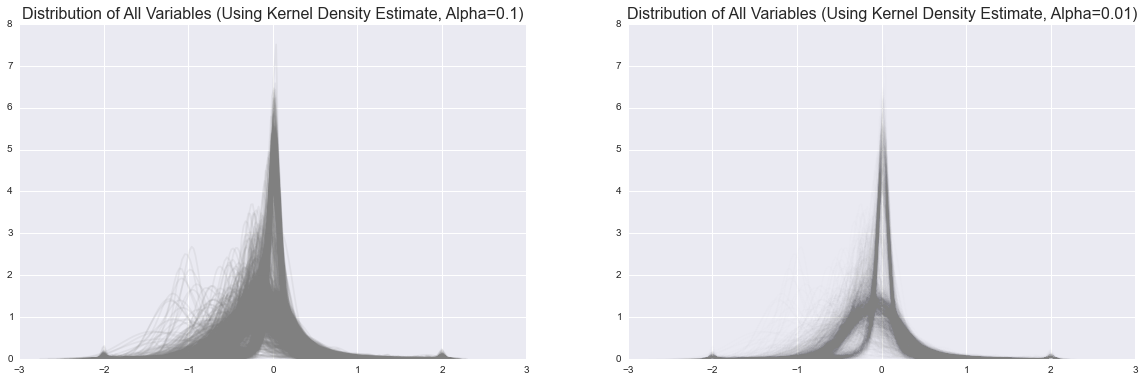

In [12]:
f, ([ax5, ax6]) = plt.subplots(1, 2, figsize=(20,6))
ax5.set_title('Distribution of All Variables (Using Kernel Density Estimate, Alpha=0.1)', size=16)
ax6.set_title('Distribution of All Variables (Using Kernel Density Estimate, Alpha=0.01)', size=16)
for column in df_vars.columns:
    sns.distplot(df_vars[column], color='gray', hist=False, axlabel=False, ax=ax5, kde_kws={'alpha':0.1})
    sns.distplot(df_vars[column], color='gray', hist=False, axlabel=False, ax=ax6, kde_kws={'alpha':0.01})

* **A sizable number of variables have high excess kurtosis**

### Correlation between class label and variables

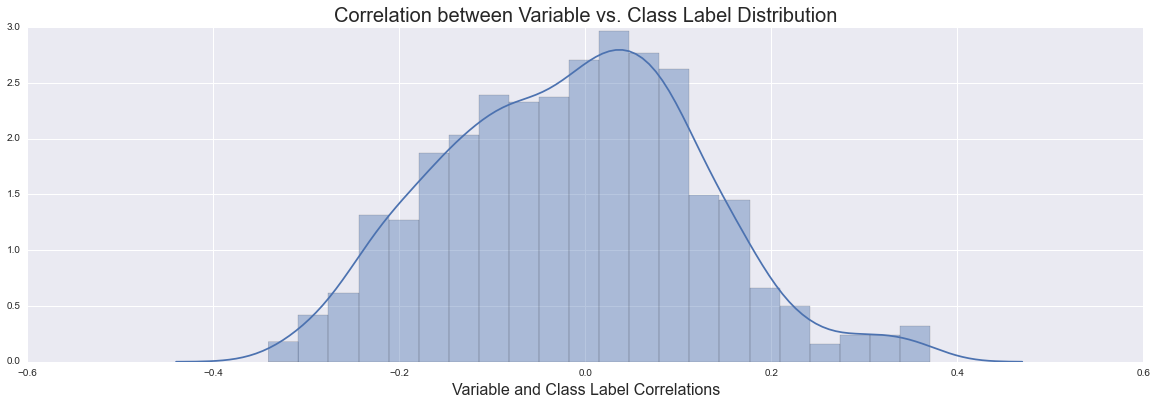

In [13]:
corr_versus_class = df.ix[:, df.columns != 'class'].corrwith(df['class'])
plt.figure(figsize=(20,6))
plt.title('Correlation between Variable vs. Class Label Distribution', size=20)
plt.xlabel('Variable and Class Label Correlations', size=16)
sns.distplot(corr_versus_class)

In [14]:
np.percentile(corr_versus_class, 50)

-0.0085486519092433638

**Observations:**
* ** Max. and min. correlations near +/- 0.4 **
* ** Roughly 50% of variables have negative correlation with class label **

** Sort variables by correlation with class label: **

In [15]:
labels = df['class']
df_vars = df.drop('class', axis=1)
df_vars = df_vars.iloc[:, corr_versus_class.argsort()[::-1]]

* ** Dataframe variables (columns) are now sorted by correlation with class labels **

### Correlation Matrix

/Users/anselm/Library/Python/2.7/lib/python/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


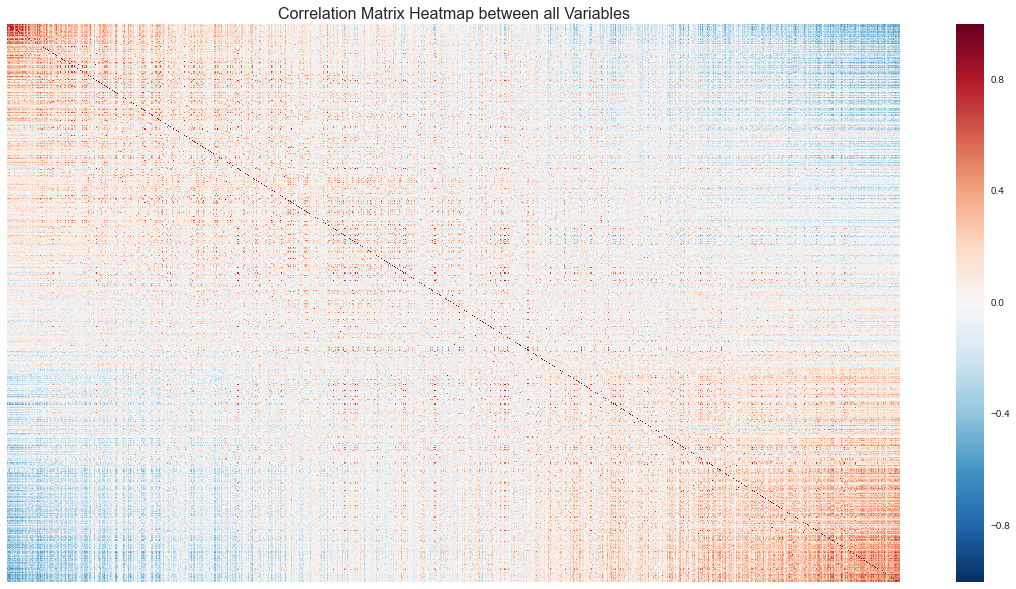

In [16]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix Heatmap between all Variables', size=16)
sns.heatmap(df_vars.corr(), xticklabels=False, yticklabels=False)

* ** Of course it's not possible to make variable-specific interpretation with a heatmap like this - but this is useful to get a very high-level gauge on the correlation matrix **

** A few Oberservations:**
* Overall map is more red than blue (e.g. if the variables are financial time-series and economic indicators, most of the variables will have a positive correlation and blue-ish column vectors indicate risk-off indicators (gold, safe-haven currencies, VIX, inverse-index ETFs, etc.)
* To predict class label, will be useful to use variables with high and low correlations - however, must check for collinearity due to large degree of collinearity (use PCA in later steps)

### Anomalous Distributions

** Test to see if distribution is close to normal use quantile-quantile plots**

In [17]:
from scipy.stats import probplot

corr_coeffs = []
for column in df_vars.columns:
    _, (slope, intercept, r) = probplot(df_vars[column], dist="norm")
    corr_coeffs.append(r)

** *Example of QQ-plot* **

* ** If distribution is perfectly normal, points should fall on line **

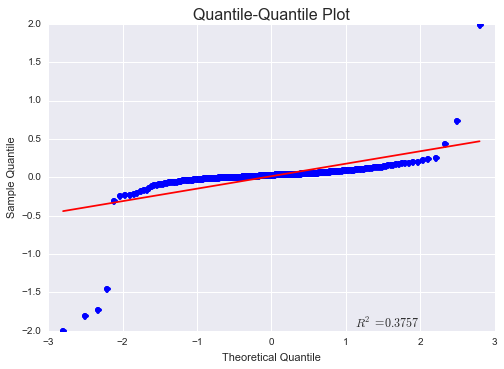

In [18]:
res = probplot(df_vars.iloc[:, np.argsort(corr_coeffs)[0]], dist="norm", plot=plt)
plt.title("Quantile-Quantile Plot", size=16)
plt.xlabel("Theoretical Quantile")
plt.ylabel("Sample Quantile")

** Track correlation coefficient of each QQ-plot (Quantile-Quantile Plot)** 
* Series with lowest values may not be normally distributed

** Plotting top 5 variables with lowest correlation coefficients**:

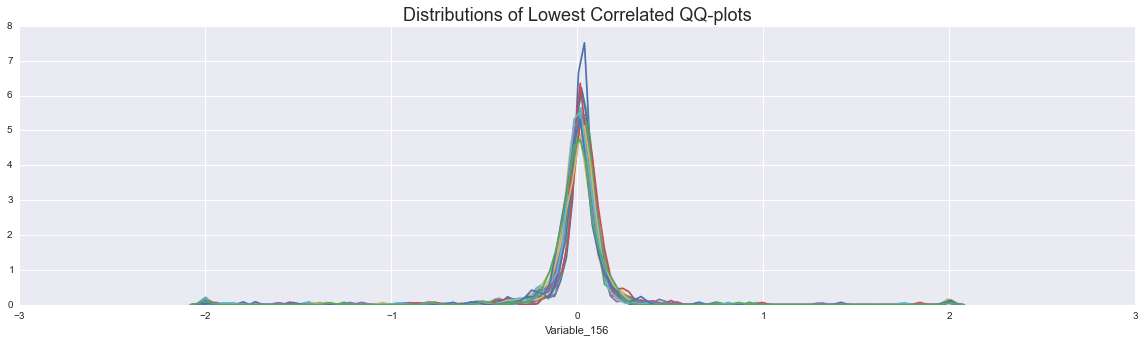

In [19]:
plt.figure(figsize=(20,5))
plt.title('Distributions of Lowest Correlated QQ-plots', size=18)
anomaly_indices = np.argsort(corr_coeffs)[:20]
for i in anomaly_indices:
    sns.distplot(df_vars.iloc[:, i], hist=False)

**Observation: Variables appear to be approx. normally distributed with varying degrees of variance, skewness and kurtosis**

# 2. PCA Analysis

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_vars.values)
pca.explained_variance_ratio_

array([ 0.14320793,  0.0537078 ])

In [21]:
df_clusters = pd.DataFrame(reduced_data, columns=['PC1','PC2'])
df_clusters['class'] = labels

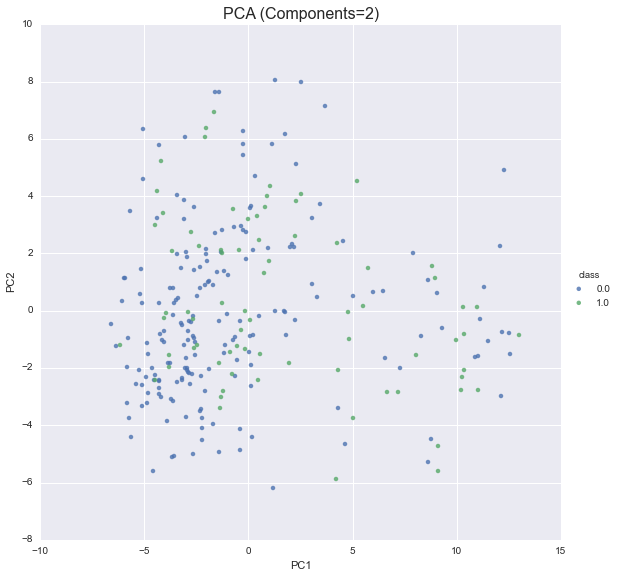

In [22]:
sns.lmplot(x='PC1', y='PC2', hue='class', data=df_clusters, size=8, fit_reg=False)
plt.title('PCA (Components=2)', size=16)

# 3A. Variable Relationship with Class Column

** For all variables, calculate correlation coefficients with class label **

* ** *Since the class label is binary, the Pearson coefficient is equal to the point biserial correlation coefficient - this statistic can be used to compute the relationship with class column* **

In [23]:
# corr_versus_class already calculated from previous step
# this is the correlations between each variable and class labels
corr_versus_class.max(), corr_versus_class.min()

(0.37055573542248649, -0.34102028024852099)

In [24]:
sig_var_name = corr_versus_class.argmax()
'Variable with most significant statistic: {}'.format(sig_var_name)

'Variable with most significant statistic: Variable_1497'

In [25]:
_df = pd.DataFrame(df[corr_versus_class.argmax()])
_df['class'] = labels
_df.columns = ['variable','class']
_df.dropna(inplace=True)
_df.head()

,variable,class
0,-0.401705,0
1,-0.399964,0
2,-0.095488,0
3,-0.475031,0
4,-0.107824,0


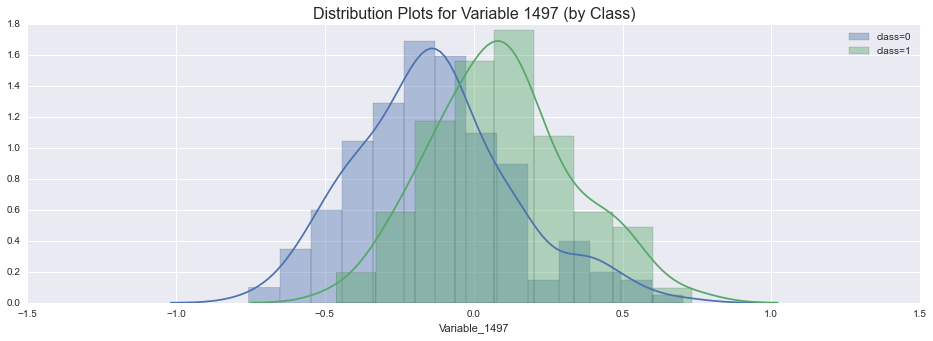

In [26]:
sns.set(rc={"figure.figsize": (16, 5)})
g = sns.distplot(_df[_df['class'] == 0].variable, label='class=0')
sns.distplot(_df[_df['class'] == 1].variable, label='class=1', ax=g, axlabel=sig_var_name)
g.legend().set_visible(True)
plt.title('Distribution Plots for Variable 1497 (by Class)', size=16)

* **Factor plots are a good choice when comparing categorical variable with continues variable because it gives a probability interpretation to the exact maximum likelihood range for each class label (assuming equal priors)**
    * e.g. in this example, when variable is < -0.1 (approx), higher likelihood for class 0

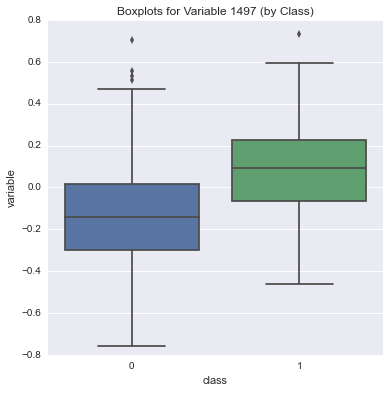

In [27]:
sns.set(rc={"figure.figsize": (6, 6)})
sns.boxplot(x="class", y='variable', data=_df)
plt.title('Boxplots for Variable 1497 (by Class)', size=12)

** Using boxplot as factor plots, it's clear that Variable 1497 is a useful predictor for the class label. **

** *Any useful summary statistic should have a noticeable mean difference between the two classes and the joint variance should be low* **

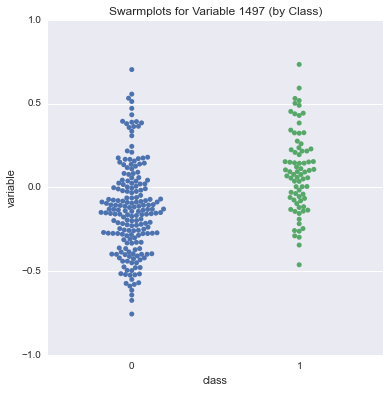

In [28]:
sns.swarmplot(x="class", y='variable', data=_df)
plt.title('Swarmplots for Variable 1497 (by Class)', size=12)

# 3B. Variable Relationship with PC1

** Most significant statistic used is the R-squared **

In [29]:
rsquared_with_pca = df_vars.corrwith(df_clusters.PC1).map(lambda x: x**2)
'Highest R-Squared: {} - {} and PC1'.format(rsquared_with_pca.max(), np.argmax(rsquared_with_pca))

'Highest R-Squared: 0.290770555672 - Variable_578 and PC1'

** Choose variable with highest R-squared with PC1 **

In [30]:
sig_var_name = rsquared_with_pca.argmax()
'Variable with most significant statistic: {}'.format(sig_var_name)

'Variable with most significant statistic: Variable_578'

In [31]:
_df = None
_df = pd.DataFrame(df[sig_var_name])
_df['pc1'] = df_clusters.PC1
_df['class'] = labels

_df.columns = ['variable','pc1', 'class']
_df.dropna(inplace=True)
_df.head()

,variable,pc1,class
0,-0.102607,-3.840729,0
1,0.176857,-4.038824,0
2,0.046355,-4.838259,0
3,0.228618,-5.117750,0
4,-0.031618,-2.582272,0


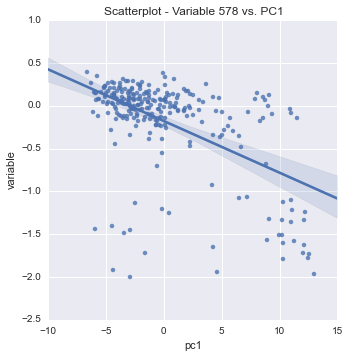

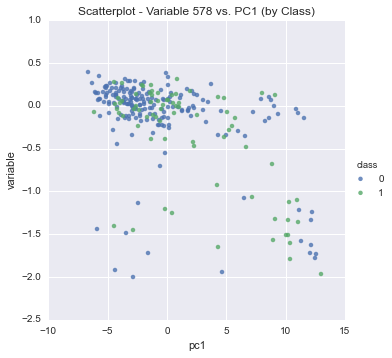

In [32]:
sns.lmplot(x="pc1", y='variable', data=_df, )
plt.title('Scatterplot - Variable 578 vs. PC1')
sns.lmplot(x="pc1", y='variable', hue='class', data=_df, fit_reg=False)
plt.title('Scatterplot - Variable 578 vs. PC1 (by Class)')

** Residual Plot between variable and PC1:** 

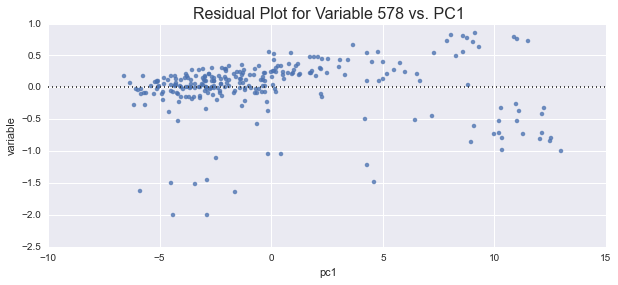

In [33]:
sns.set(rc={"figure.figsize": (10, 4)})
sns.residplot('pc1', 'variable', data=_df)
plt.title('Residual Plot for Variable 578 vs. PC1', size=16)

Residual Plot shows that the variance is not constant, variance tends to increase with PC1

*This would be a concern if we are using PC1 to predict the value of the variable*

# 4. Classifier Model

In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from itertools import product

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df_vars.values, labels.values, test_size=0.3, random_state=5)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((189, 1553), (81, 1553), (189,), (81,))

In [36]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [37]:
verbose = False

In [41]:
## Model - Generic Model (All Variables) + PCA Feature Extraction + Elastic Net

kfold = StratifiedKFold(y=y_train, n_folds=4, shuffle=True, random_state=5)
params_range = {'loss': ['hinge'], # hinge loss equivalent to SVM
                'alpha': [0.001, 0.01, 0.1, 1],
                'l1_ratio': list(np.arange(0, 1.2, 0.2)),
                'n_components': range(2, 30, 2)}
results = []

## Hyper-tuning # of components via Grid Search
for loss, alpha, l1_ratio, n_component in product(params_range['loss'], params_range['alpha'], 
                                                  params_range['l1_ratio'], params_range['n_components']):
    
    # PCA - Feature Extraction
    pca = PCA(n_components=n_component)
    reduced_data = pca.fit_transform(X_train)
    
    # Classifier
    clf = SGDClassifier(loss=loss, penalty='elasticnet', alpha=alpha, l1_ratio=l1_ratio, n_iter=1000)
    
    # Iterate k-folds
    scores_accuracy, scores_f1 = [], []
    for k, (train_index, cv_index) in enumerate(kfold):
        
        # Train model
        clf.fit(reduced_data[train_index], y_train[train_index])
        
        # Predict
        pred = clf.predict(reduced_data[cv_index])
        
        score_accuracy = round(accuracy_score(y_train[cv_index], pred), 3)
        score_f1 = round(f1_score(y_train[cv_index], pred), 3)
        
        scores_accuracy.append(score_accuracy)
        scores_f1.append(score_f1)
        
        if verbose:
            print 'Fold: {}, Accuracy: {}, F1-Score: {}, Alpha: {}, L1-ratio: {}, Loss: {}, PCA Components: {}'.format(
                k, score_accuracy, score_f1, alpha, l1_ratio, loss, n_component)
    
    # Track Scores
    results.append((round(np.mean(scores_accuracy), 3), round(np.mean(scores_f1), 3), 
                    alpha, l1_ratio, loss, n_component))

In [39]:
print 'Best Accuracy: {}'.format(max(results, key=lambda x: x[0]))
print 'Best F1-Score: {}'.format(max(results, key=lambda x: x[1]))

Best Accuracy: (0.746, 0.474, 0.1, 0.0, 'hinge', 22)
Best F1-Score: (0.741, 0.511, 0.001, 1.0, 'hinge', 22)


### *Use model with best F1-score*

In [46]:
# Feature Extraction with all training data
pca = PCA(n_components=18)
train_reduced_data = pca.fit_transform(X_train)

# Training model with all training data
clf = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=0.001, l1_ratio=0.6, n_iter=10000)
clf.fit(train_reduced_data, y_train)

# Transform test data to new subspace
test_reduced_data = pca.transform(X_test)
pred = clf.predict(test_reduced_data)

# Test model
score_accuracy = round(accuracy_score(y_test, pred), 3)
score_f1 = round(f1_score(y_test, pred), 3)
score_precision = round(precision_score(y_test, pred), 3)
score_recall = round(recall_score(y_test, pred), 3)

score_accuracy, score_f1, score_precision, score_recall

(0.765, 0.558, 0.667, 0.48)